# **Importing Libraries**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import PIL.Image as image

# **Use Tensorflow hub Mobile Net for prediction**

In [2]:
URL = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2'

In [3]:
IMAGE_SIZE = 224

In [4]:
model = tf.keras.Sequential([
    hub.KerasLayer(URL, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


In [6]:
tmp_image = tf.keras.utils.get_file('tmp_image.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
tmp_image

73728/61306 [====================================] - 0s 0us/step


'/root/.keras/datasets/tmp_image.jpg'

In [7]:
tmp_image = image.open(tmp_image).resize((IMAGE_SIZE, IMAGE_SIZE))

In [8]:
type(tmp_image)

PIL.Image.Image

In [9]:
tmp_image = np.array(tmp_image)/255.
tmp_image.shape, type(tmp_image)

((224, 224, 3), numpy.ndarray)

In [10]:
# Change into input form (first way)
tf.expand_dims(tmp_image, axis=0).shape

TensorShape([1, 224, 224, 3])

In [11]:
# Change into input form (second way)
tmp_image[np.newaxis, ...].shape

(1, 224, 224, 3)

In [12]:
tmp_image.shape

(224, 224, 3)

In [13]:
# Predict the result
result = model.predict(tf.expand_dims(tmp_image, axis=0))
result

array([[ 0.19971359,  1.0666462 , -0.10109375, ...,  0.15688017,
        -0.60558677, -0.04497072]], dtype=float32)

In [14]:
result.shape

(1, 1001)

In [15]:
result[0]

array([ 0.19971359,  1.0666462 , -0.10109375, ...,  0.15688017,
       -0.60558677, -0.04497072], dtype=float32)

In [16]:
# Predict the class
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

653

In [17]:
# Decode the prediction
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
labels_path

24576/10484 [======================================================================] - 0s 0us/step


'/root/.keras/datasets/ImageNetLabels.txt'

In [18]:
imagenet_labels = np.array(open(labels_path).read().splitlines())
len(imagenet_labels)

1001

In [19]:
print(imagenet_labels)

['background' 'tench' 'goldfish' ... 'bolete' 'ear' 'toilet tissue']


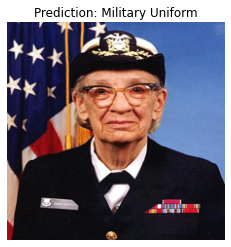

In [20]:
plt.imshow(tmp_image)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

# **Cats and Dogs Classification using Pretrained Model**

In [21]:
# Load the dataset

(train_examples, validation_examples), metadata = tfds.load('cats_vs_dogs',
                                                            with_info=True,
                                                            as_supervised=True,
                                                            split=['train[:80%]', 'train[80%:]'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete69S1E4/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [22]:
metadata

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    version=4.0.0,
    description='A large set of images of cats and dogs.There are 1738 corrupted images that are dropped.',
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=23262,
    splits={
        'train': 23262,
    },
    supervised_keys=('image', 'label'),
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    title = {Asirra: A CAPTCHA that Exploits Interest-Aligned Manual Image Categorization},
    booktitle = {Proceedings of 14th ACM Conference on Computer and Communications Security (CCS)},
    ye

In [23]:
metadata.name

'cats_vs_dogs'

In [24]:
num_examples = metadata.splits['train'].num_examples
num_examples

23262

In [25]:
num_classes = metadata.features['label'].num_classes
num_classes

2

In [26]:
len(train_examples), len(validation_examples)

(18610, 4652)

In [27]:
train_examples, validation_examples

(<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>,
 <PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>)

In [28]:
for i, example_image in enumerate(train_examples.take(3)):
  print(i, example_image[0].shape)

0 (262, 350, 3)
1 (409, 336, 3)
2 (493, 500, 3)


In [29]:
def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))/255.0
  return image, label

In [30]:
BATCH_SIZE = 32

In [31]:
train_batches = train_examples.map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_examples.map(format_image).batch(BATCH_SIZE).prefetch(1)

In [32]:
train_batches, validation_batches

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>)

In [33]:
image_batch, label_batch = next(iter(train_batches.take(1)))

In [34]:
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

In [35]:
len(image_batch), len(label_batch)

(32, 32)

In [36]:
result_batch = model.predict(image_batch)
result_batch

array([[ 0.17773986, -0.29468197,  0.5076974 , ..., -0.18016478,
        -0.8082444 , -0.40053117],
       [ 0.16746908, -0.30697793,  0.61929315, ..., -0.2940785 ,
        -0.06466059, -1.4366775 ],
       [ 0.24529448,  0.06254127, -0.29660875, ...,  0.31014094,
         0.83069974, -0.0977929 ],
       ...,
       [ 0.33045557, -1.2034569 , -0.35872915, ..., -0.61632687,
        -0.22310251, -0.24744195],
       [ 0.25769994,  0.35484082, -0.3739506 , ...,  0.27555168,
         2.0159526 ,  0.93729544],
       [ 0.29516473, -0.24455234,  0.3569184 , ...,  0.06362895,
         0.60149807, -0.1622324 ]], dtype=float32)

In [37]:
predicted_class_name = imagenet_labels[np.argmax(result_batch, axis=-1)]
print(predicted_class_name)

['boxer' 'Chihuahua' 'beagle' 'tabby' 'Cardigan' 'Great Dane' 'tiger cat'
 'dishwasher' 'patas' 'bluetick' 'American Staffordshire terrier'
 'paper towel' 'tiger cat' 'Boston bull' 'Egyptian cat' 'Egyptian cat'
 'tiger cat' 'Labrador retriever' 'Egyptian cat' 'Labrador retriever'
 'Labrador retriever' 'tabby' 'Chesapeake Bay retriever' 'papillon'
 'Siamese cat' 'bucket' 'Labrador retriever' 'French bulldog'
 'German shepherd' 'Saluki' 'miniature poodle' 'Kerry blue terrier']


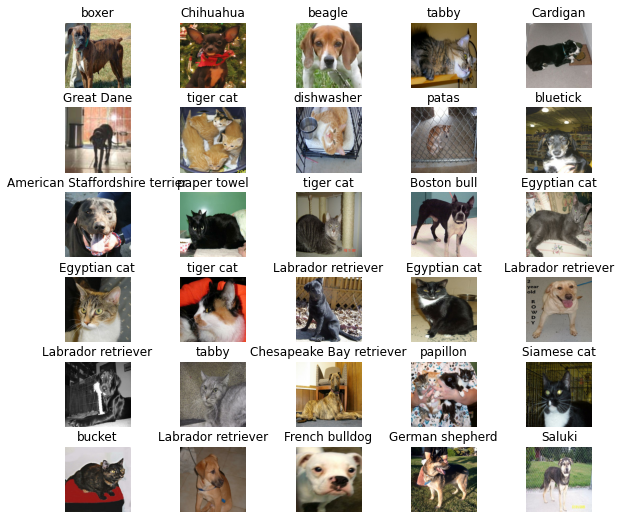

In [38]:
plt.figure(figsize=(10,9))

for n in range(30):
  plt.subplot(6, 5, n+1)
  plt.subplots_adjust(hspace=0.3)
  plt.imshow(image_batch[n])
  plt.axis('off')
  plt.title(predicted_class_name[n])

# **Transfer Learning**

In [39]:
URL = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2'
URL

'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2'

In [40]:
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

In [41]:
feature_extractor

In [42]:
feature_batch = feature_extractor(image_batch)
feature_batch.shape

TensorShape([32, 1280])

In [43]:
feature_extractor.trainable = False

In [44]:
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(2)
])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [46]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [47]:
EPOCHS = 6

In [48]:
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/6
582/582 [==============================] - 60s 96ms/step - loss: 0.0568 - accuracy: 0.9805 - val_loss: 0.0346 - val_accuracy: 0.9873
Epoch 2/6
582/582 [==============================] - 55s 94ms/step - loss: 0.0305 - accuracy: 0.9898 - val_loss: 0.0339 - val_accuracy: 0.9882
Epoch 3/6
582/582 [==============================] - 55s 94ms/step - loss: 0.0258 - accuracy: 0.9922 - val_loss: 0.0343 - val_accuracy: 0.9884
Epoch 4/6
582/582 [==============================] - 55s 94ms/step - loss: 0.0223 - accuracy: 0.9932 - val_loss: 0.0347 - val_accuracy: 0.9882
Epoch 5/6
582/582 [==============================] - 55s 94ms/step - loss: 0.0196 - accuracy: 0.9942 - val_loss: 0.0351 - val_accuracy: 0.9884
Epoch 6/6
582/582 [==============================] - 55s 94ms/step - loss: 0.0174 - accuracy: 0.9949 - val_loss: 0.0357 - val_accuracy: 0.9884


In [50]:
history.history

{'accuracy': [0.980548083782196,
  0.9898441433906555,
  0.9922084808349609,
  0.9932294487953186,
  0.9941966533660889,
  0.9949489235877991],
 'loss': [0.05678912252187729,
  0.03049585409462452,
  0.0257578007876873,
  0.02234453707933426,
  0.01962749846279621,
  0.017438488081097603],
 'val_accuracy': [0.9873172640800476,
  0.9881771206855774,
  0.9883921146392822,
  0.9881771206855774,
  0.9883921146392822,
  0.9883921146392822],
 'val_loss': [0.03458038344979286,
  0.03385895490646362,
  0.03434471786022186,
  0.034698449075222015,
  0.035144537687301636,
  0.0356830358505249]}

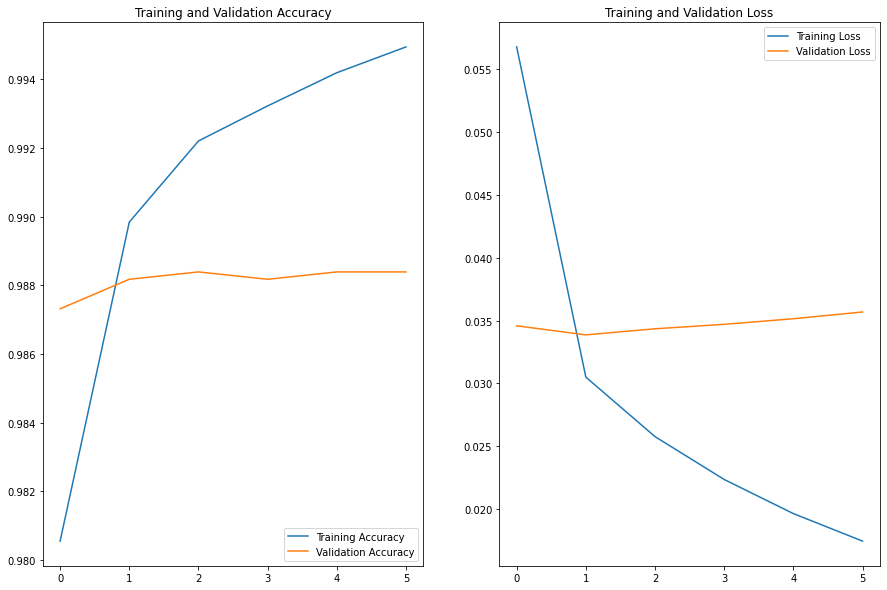

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [53]:
class_names = np.array(metadata.features['label'].names)
class_names

array(['cat', 'dog'], dtype='<U3')

In [57]:
predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()

predicted_ids = np.argmax(predicted_batch, axis=-1)

predicted_class_names = class_names[predicted_ids]
predicted_class_names

array(['dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog',
       'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog',
       'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog'], dtype='<U3')

In [58]:
print("Labels: ", label_batch)
print("Predicted labels: ", predicted_ids)

Labels:  [1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1]
Predicted labels:  [1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1]


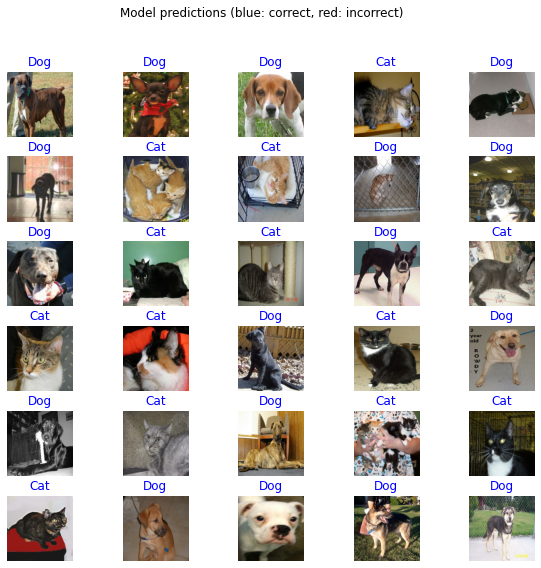

In [59]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")